___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Tensorflow Project Exercise
Let's wrap up this Deep Learning by taking a a quick look at the effectiveness of Neural Nets!

We'll use the [Bank Authentication Data Set](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) from the UCI repository.

The data consists of 5 columns:

* variance of Wavelet Transformed image (continuous)
* skewness of Wavelet Transformed image (continuous)
* curtosis of Wavelet Transformed image (continuous)
* entropy of image (continuous)
* class (integer)

Where class indicates whether or not a Bank Note was authentic.

This sort of task is perfectly suited for Neural Networks and Deep Learning! Just follow the instructions below to get started!

## Get the Data

** Use pandas to read in the bank_note_data.csv file **

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank_note_data.csv')

** Check the head of the Data **

In [3]:
df.head()

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.Var     1372 non-null float64
Image.Skew    1372 non-null float64
Image.Curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df['Class'] = df['Class'].apply(int)

## EDA

We'll just do a few quick plots of the data.

** Import seaborn and set matplolib inline for viewing **

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

** Create a Countplot of the Classes (Authentic 1 vs Fake 0) **

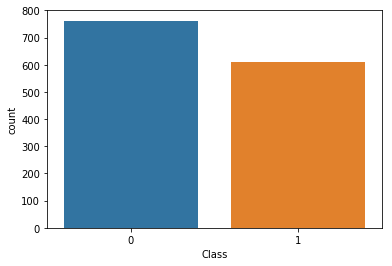

In [7]:
sns.countplot(data=df,x='Class')

** Create a PairPlot of the Data with Seaborn, set Hue to Class **

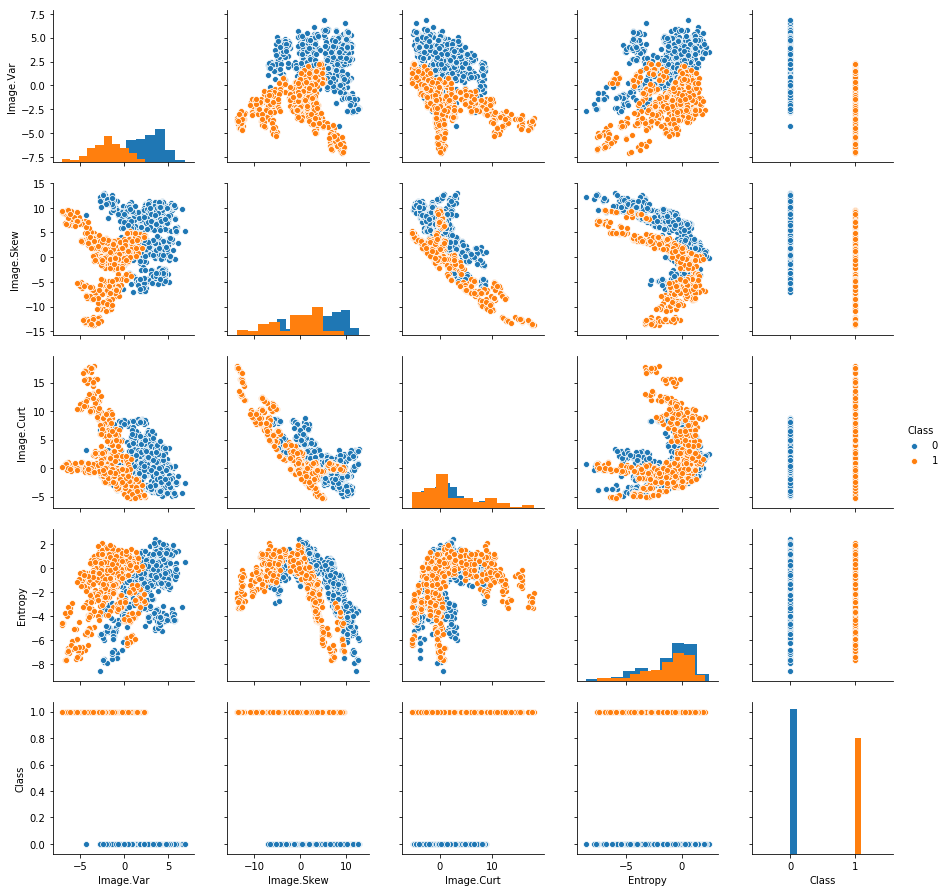

In [8]:
sns.pairplot(data=df,hue='Class',diag_kind='hist')

## Data Preparation 

When using Neural Network and Deep Learning based systems, it is usually a good idea to Standardize your data, this step isn't actually necessary for our particular data set, but let's run through it for practice!

### Standard Scaling



In [9]:
from sklearn.preprocessing import StandardScaler

**Create a StandardScaler() object called scaler.**

In [10]:
sc = StandardScaler()

**Fit scaler to the features.**

In [11]:
feat = df.drop('Class',axis=1)

In [12]:
sc.fit(feat)

StandardScaler(copy=True, with_mean=True, with_std=True)

**Use the .transform() method to transform the features to a scaled version.**

In [13]:
scaled_data = sc.transform(feat)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [14]:
X = pd.DataFrame(scaled_data,columns=feat.columns)

In [15]:
X.head()

,Image.Var,Image.Skew,Image.Curt,Entropy
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


## Train Test Split

** Create two objects X and y which are the scaled feature values and labels respectively.**

In [16]:
y=df['Class']

In [17]:
from sklearn.model_selection import train_test_split

** Use SciKit Learn to create training and testing sets of the data as we've done in previous lectures:**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Tensorflow

In [19]:
import tensorflow as tf

** Create a list of feature column objects using tf.feature.numeric_column() as we did in the lecture**

In [20]:
feat_col = []

for col in X.columns:
    feat_col.append(tf.feature_column.numeric_column(col))


In [21]:
feat_col

[_NumericColumn(key='Image.Var', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Skew', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Image.Curt', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Entropy', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

** Create an object called classifier which is a DNNClassifier from learn. Set it to have 2 classes and a [10,20,10] hidden unit layer structure:**

In [22]:
classifier = tf.estimator.DNNClassifier(
    hidden_units=[10,20,10],
    feature_columns=feat_col,
    n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/f9/jjw5gdz96wqb4d28dm_4kgt40000gn/T/tmpk6bc0q19', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x114077ac8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


** Now create a tf.estimator.pandas_input_fn that takes in your X_train, y_train, batch_size and set shuffle=True. You can play around with the batch_size parameter if you want, but let's start by setting it to 20 since our data isn't very big. **

In [23]:
train_input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=20,shuffle=True)

** Now train classifier to the input function. Use steps=500. You can play around with these values if you want!**

*Note: Ignore any warnings you get, they won't effect your output*

In [24]:
classifier.train(input_fn=train_input_func,steps=500)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/f9/jjw5gdz96wqb4d28dm_4kgt40000gn/T/tmpk6bc0q19/model.ckpt.
INFO:tensorflow:loss = 13.3513155, step = 1
INFO:tensorflow:Saving checkpoints for 48 into /var/folders/f9/jjw5gdz96wqb4d28dm_4kgt40000gn/T/tmpk6bc0q19/model.ckpt.
INFO:tensorflow:Loss for final step: 0.3277619.


## Model Evaluation

** Create another pandas_input_fn that takes in the X_test data for x. Remember this one won't need any y_test info since we will be using this for the network to create its own predictions. Set shuffle=False since we don't need to shuffle for predictions.**

In [25]:
test_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=len(X_test),num_epochs=1,shuffle=False)

** Use the predict method from the classifier model to create predictions from X_test **

In [26]:
pred = list(classifier.predict(input_fn=test_input_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/f9/jjw5gdz96wqb4d28dm_4kgt40000gn/T/tmpk6bc0q19/model.ckpt-48
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [27]:
pred

[{'logits': array([-6.043244], dtype=float32),
  'logistic': array([0.00236822], dtype=float32),
  'probabilities': array([0.9976318 , 0.00236822], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-3.1873055], dtype=float32),
  'logistic': array([0.03964625], dtype=float32),
  'probabilities': array([0.96035373, 0.03964625], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-7.8156886], dtype=float32),
  'logistic': array([0.00040319], dtype=float32),
  'probabilities': array([9.9959677e-01, 4.0319434e-04], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-8.310147], dtype=float32),
  'logistic': array([0.00024595], dtype=float32),
  'probabilities': array([9.997540e-01, 2.459473e-04], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-9.831346], dtype=float32),
  'lo

In [28]:
predictions = []
for val in pred:
    predictions.append(val['class_ids'][0])

** Now create a classification report and a Confusion Matrix. Does anything stand out to you?**

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(y_test,predictions))
print('----------------------------------------')
print(classification_report(y_test,predictions))

[[231   3]
 [  0 178]]
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       234
           1       0.98      1.00      0.99       178

   micro avg       0.99      0.99      0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [63]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,


In [80]:
df.iloc[y_test[y_test.values!=predictions].index.values]

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
476,0.3798,0.7098,0.7572,-0.4444,0
320,0.5195,-3.2633,3.0895,-0.9849,0
145,0.5195,-3.2633,3.0895,-0.9849,0


## Optional Comparison

** You should have noticed extremely accurate results from the DNN model. Let's compare this to a Random Forest Classifier for a reality check!**

**Use SciKit Learn to Create a Random Forest Classifier and compare the confusion matrix and classification report to the DNN model**

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rndfor = RandomForestClassifier(n_estimators=200)

In [33]:
rndfor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
pred_rnd = rndfor.predict(X_test)

In [35]:
print(confusion_matrix(y_test,pred_rnd))
print('----------------------------------------')
print(classification_report(y_test,pred_rnd))

[[233   1]
 [  0 178]]
----------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       0.99      1.00      1.00       178

   micro avg       1.00      1.00      1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



In [86]:
df.iloc[y_test[y_test.values!=pred_rnd].index.values]

,Image.Var,Image.Skew,Image.Curt,Entropy,Class
224,-0.36038,4.1158,3.1143,-0.37199,0


** It should have also done very well, possibly perfect! Hopefully you have seen the power of DNN! **

# Great Job!